In [1]:
import numpy as np
import pandas as pd 
import statsmodels.formula.api as smf
import plotly.express as px


In [2]:
data = pd.read_csv("data.csv")

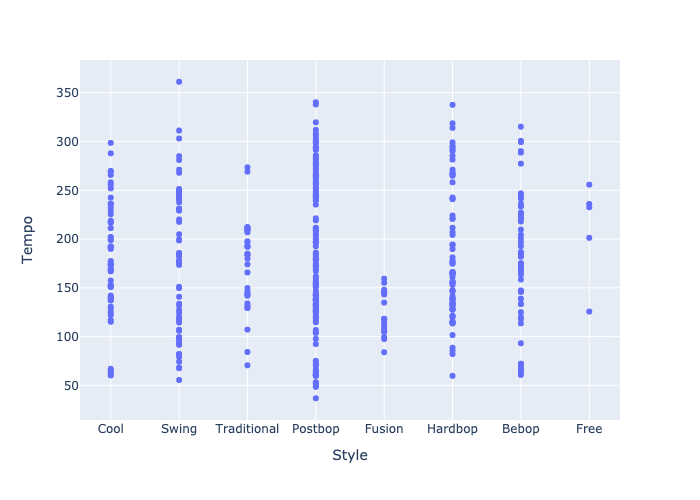

In [3]:
fig1 = px.scatter(data,x="Style",y="Tempo")
fig1.show("png")

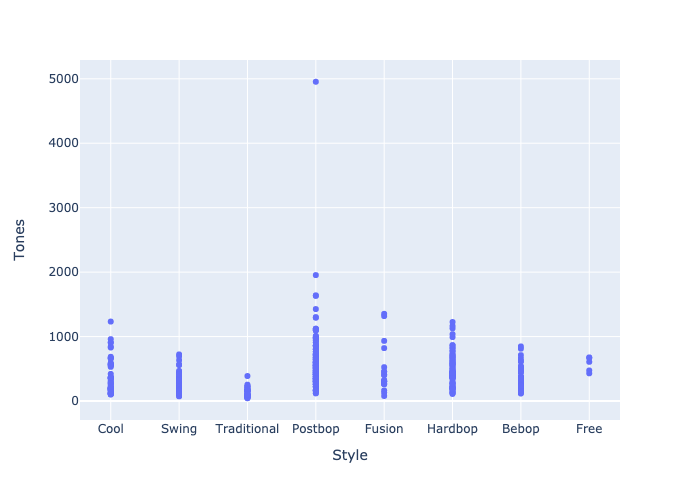

In [4]:
fig2 = px.scatter(data,x="Style",y="Tones")
fig2.show("png")

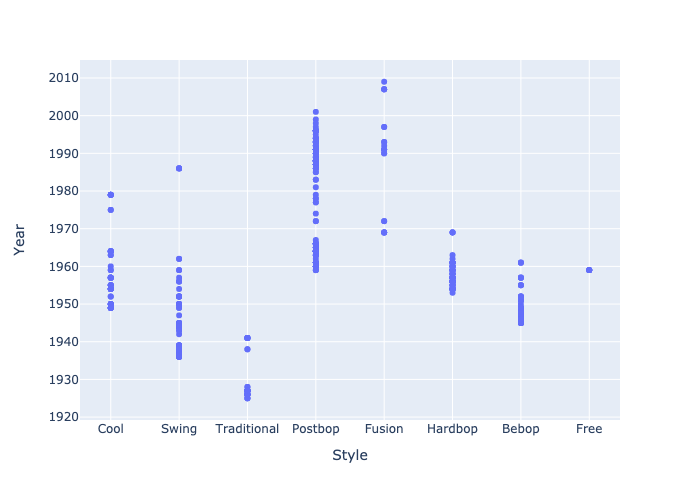

In [5]:
fig3 = px.scatter(data,x="Style",y="Year")
fig3.show("png")

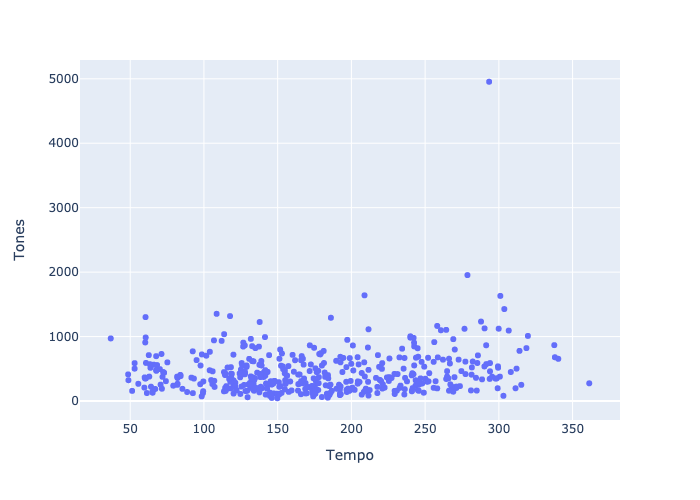

In [6]:
px.scatter(data,x="Tempo",y="Tones").show("png")

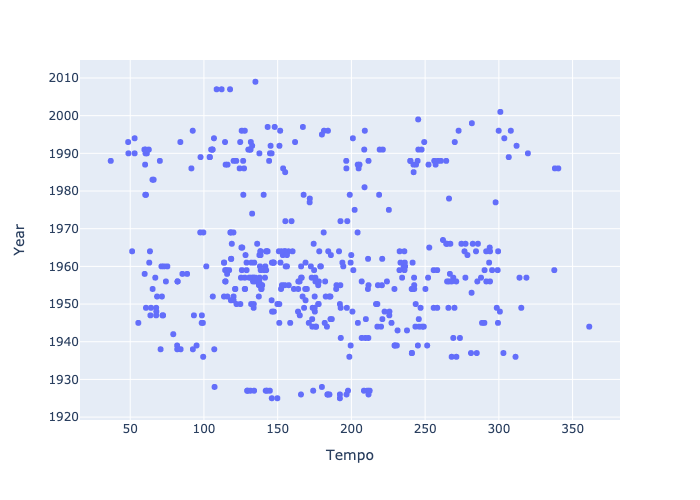

In [7]:
px.scatter(data,x="Tempo",y="Year").show("png")


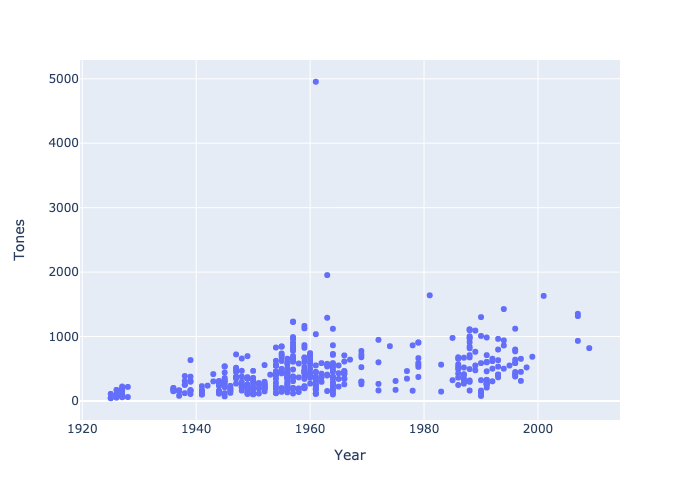

In [8]:
px.scatter(data,x="Year",y="Tones").show("png")

Maybe slight correlation between Tones and Year? This makes sense since audio clarity in speakers and fidelity in recording equipment has improved over the years. Maybe jazz musicians have also gotten more expressive and experimental with certian songwriting, recording and arrangement techniques.

In [9]:
data["Year"].corr(data["Tones"])

0.3866235236784666

Not a very strong correlation, however.

In [10]:
year = pd.to_numeric(data["Year"])
tones = pd.to_numeric(data["Tones"])
tempo = pd.to_numeric(data["Tempo"])


In [11]:
data["Style"].value_counts()
style=data["Style"]

In [19]:
df = pd.DataFrame({'style':style,'year':year,'tempo':tempo,'tones':tones})
df=df.loc[(df['style']=='Cool') | (df['style']=='Swing') | (df['style']=='Bebop') | (df['style']=='Hardbop')]
pd.factorize(df['style'])[1]



Index(['Cool', 'Swing', 'Hardbop', 'Bebop'], dtype='object')

In [20]:
df['style']=pd.factorize(df['style'])[0]

In [21]:
fit1 = smf.mnlogit('style~tempo',data=df).fit()
print(fit1.summary())

Optimization terminated successfully.
         Current function value: 1.376050
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:                  style   No. Observations:                  252
Model:                        MNLogit   Df Residuals:                      246
Method:                           MLE   Df Model:                            3
Date:                Mon, 15 May 2023   Pseudo R-squ.:               0.0005010
Time:                        19:50:06   Log-Likelihood:                -346.76
converged:                       True   LL-Null:                       -346.94
Covariance Type:            nonrobust   LLR p-value:                    0.9508
   style=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3656      0.522      0.701      0.484      -0.657       1.389
tempo         -0.0009      0.

In [22]:
fit2 = smf.mnlogit('style~tones',data=df).fit()
print(fit2.summary())

Optimization terminated successfully.
         Current function value: 1.302815
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                  style   No. Observations:                  252
Model:                        MNLogit   Df Residuals:                      246
Method:                           MLE   Df Model:                            3
Date:                Mon, 15 May 2023   Pseudo R-squ.:                 0.05370
Time:                        19:50:11   Log-Likelihood:                -328.31
converged:                       True   LL-Null:                       -346.94
Covariance Type:            nonrobust   LLR p-value:                 4.058e-08
   style=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2799      0.387      3.310      0.001       0.522       2.038
tones         -0.0034      0.

In [23]:
fit3 = smf.mnlogit('style~year',data=df).fit()
print(fit3.summary())

Optimization terminated successfully.
         Current function value: 1.202503
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                  style   No. Observations:                  252
Model:                        MNLogit   Df Residuals:                      246
Method:                           MLE   Df Model:                            3
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.1266
Time:                        19:50:14   Log-Likelihood:                -303.03
converged:                       True   LL-Null:                       -346.94
Covariance Type:            nonrobust   LLR p-value:                 6.453e-19
   style=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    423.4228     64.443      6.570      0.000     297.116     549.729
year          -0.2167      0.

In [24]:
fit4 = smf.mnlogit('style~tones+tempo+year',data=df).fit()
print(fit4.summary())

Optimization terminated successfully.
         Current function value: 1.168084
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                  style   No. Observations:                  252
Model:                        MNLogit   Df Residuals:                      240
Method:                           MLE   Df Model:                            9
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.1516
Time:                        19:51:25   Log-Likelihood:                -294.36
converged:                       True   LL-Null:                       -346.94
Covariance Type:            nonrobust   LLR p-value:                 1.415e-18
   style=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    406.9396     67.548      6.024      0.000     274.548     539.332
tones         -0.0011      0.

In [25]:
fit5 = smf.mnlogit('style~tones+tempo',data=df).fit()
print(fit5.summary())

Optimization terminated successfully.
         Current function value: 1.302688
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                  style   No. Observations:                  252
Model:                        MNLogit   Df Residuals:                      243
Method:                           MLE   Df Model:                            6
Date:                Mon, 15 May 2023   Pseudo R-squ.:                 0.05379
Time:                        19:54:23   Log-Likelihood:                -328.28
converged:                       True   LL-Null:                       -346.94
Covariance Type:            nonrobust   LLR p-value:                 1.524e-06
   style=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3744      0.626      2.194      0.028       0.146       2.602
tones         -0.0034      0.

In [26]:
fitnull = smf.mnlogit('style~1',data=df).fit()
print(fitnull.summary())

Optimization terminated successfully.
         Current function value: 1.376739
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:                  style   No. Observations:                  252
Model:                        MNLogit   Df Residuals:                      249
Method:                           MLE   Df Model:                            0
Date:                Mon, 15 May 2023   Pseudo R-squ.:               2.422e-11
Time:                        19:54:55   Log-Likelihood:                -346.94
converged:                       True   LL-Null:                       -346.94
Covariance Type:            nonrobust   LLR p-value:                       nan
   style=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2007      0.183      1.094      0.274      -0.159       0.560
-----------------------------